#  Redistributor examples

In this notebook, you can find examples on usage the Redistributor class.

## Case with known source distribution

### Exponential -> Gaussian

- We know the source distribution from which we have a data sample.
- We want this data sample to be transformed into a specified targed distribution.
- Default target distribution is Gaussian with mean = 0 and variance = 1.

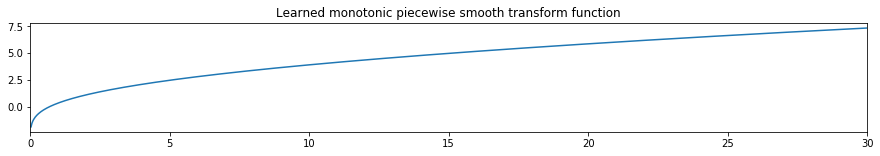

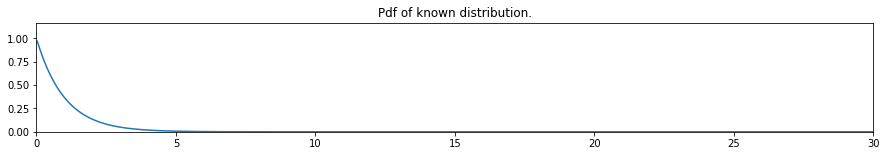

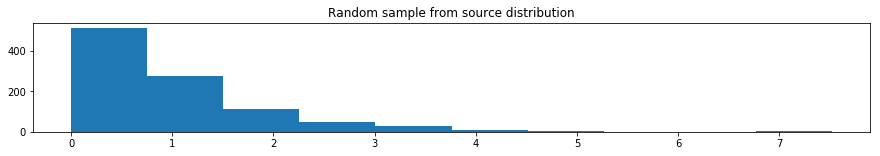

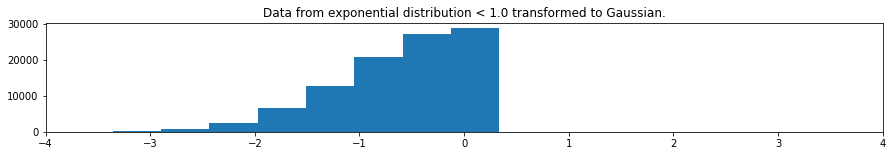

Inverse transform works: True


In [16]:
%matplotlib inline
import numpy as np
from scipy.stats import expon
from redistributor import Redistributor

# We know, our data come from exponential distribution
source = expon(loc=0.0, scale=1.0) 
# And are bounded on this interval
bbox=[0.,30.]

# Randomly generated train data from exponential distribution
x = source.rvs(size=int(1e03))

# Randomly generated validation data < 1.0
v = source.rvs(size=int(1e06))
v = v[v < 1][:int(1e05)]

r = Redistributor(known_distribution=source, bbox=bbox)
t = r.transform(v)

# Testing the inverse_transform
i = r.inverse_transform(t)

r.plot_transform_function()
r.plot_source_pdf()
r.plot_hist(x, title='Random sample from source distribution')
r.plot_hist(t, xlim=(-4,4), title='Data from exponential distribution < 1.0 transformed to Gaussian.')
print('Inverse transform works: {}'.format(np.allclose(v, i)))

# Case with unknown source distribution

### Uniform -> Gaussian

- We do not know the source distribution but we assume, we have a random sample from it.
- We want this data sample to be transformed into a specified targed distribution.
- Default target distribution is Gaussian with mean = 0 and variance = 1.

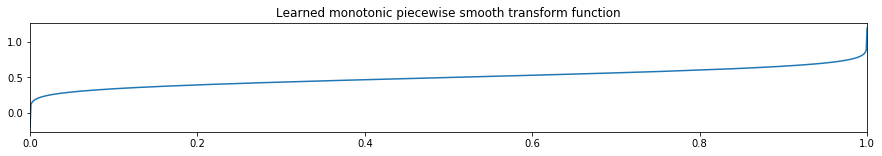

/media/paloha/Data2TB/Work/VUT/Projects/redistributor/.venv/lib/python3.5/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


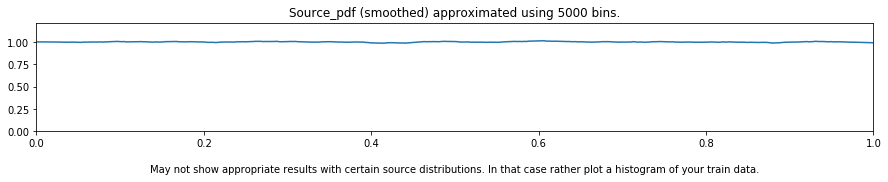

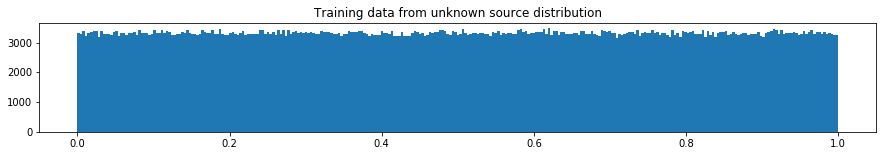

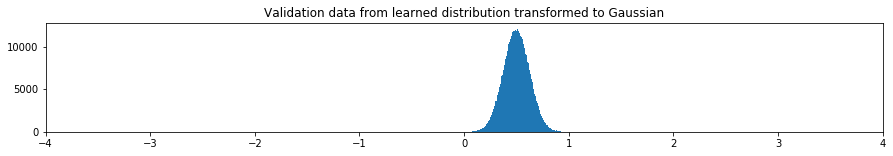

Empirical error (mse): 0.00000060


In [17]:
%matplotlib inline
import numpy as np
from scipy.stats import uniform, norm
from redistributor import Redistributor

# We know the bounding box of our data
source = uniform() 
bbox=[0.,1.]

# Randomly generated train data from uniform distribution
x = source.rvs(size=int(1e06))

# Randomly generated validation data from uniform distribution
v = source.rvs(size=int(1e06))

# We specify our target to have 0.5 mean and 0.125 variance
d = Redistributor(target=norm(loc=0.5, scale=0.125), bbox=bbox, bins=0)
d.fit(x)
t = d.transform(v)

d.plot_transform_function()
d.plot_source_pdf()
d.plot_hist(x, title='Training data from unknown source distribution')
d.plot_hist(t, xlim=(-4,4), title='Validation data from learned distribution transformed to Gaussian')
error = d.compute_empirical_cdf_error(v, 'mse')
print('Empirical error (mse): {:.8f}'.format(error))
